<a href="https://colab.research.google.com/github/shubham-dalmia/Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv("hr_data.csv")

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [ ]:
df.groupby(['left']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From this data we can conclude that satisfaction_level, average_monthly_hours, time_spend_company, Work_accident,   promotion_last_5years

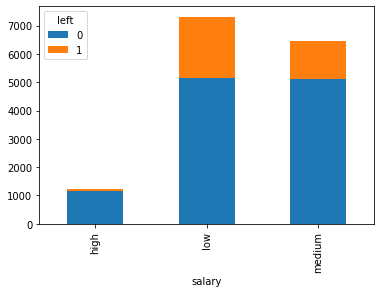

In [ ]:
pd.crosstab(df['salary'],df['left']).plot.bar(stacked=True)

It's visible from the graph that employee retention goes on increasing with increase in salary

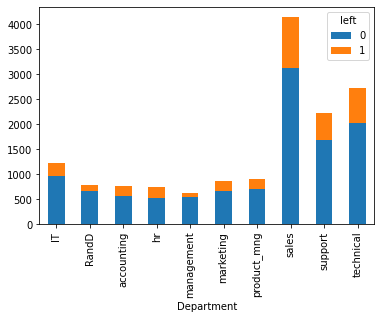

In [ ]:
pd.crosstab(df['Department'],df['left']).plot.bar(stacked=True)

In [ ]:
df.groupby(['Department']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


As we can see from this data that department of the employee doesn't play important role in retention

In [ ]:
df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,157,3,0,1,0,sales,low
1,0.80,262,6,0,1,0,sales,medium
2,0.11,272,4,0,1,0,sales,medium
3,0.72,223,5,0,1,0,sales,low
4,0.37,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,1,0,support,low
14995,0.37,160,3,0,1,0,support,low
14996,0.37,143,3,0,1,0,support,low
14997,0.11,280,4,0,1,0,support,low


In [ ]:
new=df.join([pd.get_dummies(df.salary,prefix="salary")])
new

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
0,0.38,157,3,0,1,0,sales,low,0,1,0
1,0.80,262,6,0,1,0,sales,medium,0,0,1
2,0.11,272,4,0,1,0,sales,medium,0,0,1
3,0.72,223,5,0,1,0,sales,low,0,1,0
4,0.37,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,1,0,support,low,0,1,0
14995,0.37,160,3,0,1,0,support,low,0,1,0
14996,0.37,143,3,0,1,0,support,low,0,1,0
14997,0.11,280,4,0,1,0,support,low,0,1,0


In [ ]:
neww=new.drop(['salary','Department'],axis=1)
neww

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,1,0,0,1,0
1,0.80,262,6,0,1,0,0,0,1
2,0.11,272,4,0,1,0,0,0,1
3,0.72,223,5,0,1,0,0,1,0
4,0.37,159,3,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,1,0,0,1,0
14995,0.37,160,3,0,1,0,0,1,0
14996,0.37,143,3,0,1,0,0,1,0
14997,0.11,280,4,0,1,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(neww, neww.left, test_size=0.2)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
1777,0.39,147,3,0,1,0,0,0,1
11769,0.73,233,2,0,0,0,0,1,0
4247,0.86,252,4,0,0,0,0,1,0
3487,0.14,267,6,1,0,0,0,1,0
11320,0.57,269,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
10494,0.79,222,4,0,0,0,0,1,0
5815,0.94,217,5,0,0,0,0,1,0
13361,0.54,118,5,0,0,0,0,1,0
3520,0.52,119,2,0,0,0,0,1,0


In [ ]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
model.score(X_test,y_test)

1.0